In [ ]:
# Задание 1

In [53]:
import pandas as pd

df = pd.read_csv("weights_heights.csv")

In [54]:
df.head()

,Height,Weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [64]:
from sklearn.model_selection import train_test_split

X = df[['Height']] # матрица объект-признак. Обычно признаков > 1
y = df['Weight'] # вектор целевой переменной

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
X.shape

(25000, 1)

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

model.fit(Xtrain, ytrain) # обучение модели

coef = float(model.coef_) # веса при признаках
intercept = model.intercept_ # свободный коэффициент (w0)
print(f'''
Вес при признаке "рост": {coef:.3f},
Свободный коэффициент:  {intercept:.3f}''')


Вес при признаке "рост": 3.071,
Свободный коэффициент:  -81.737


<ipython-input-66-135bb2dc9a87>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  coef = float(model.coef_) # веса при признаках


In [74]:
h = df['Height'][4]
w = df['Weight'][4]

In [75]:
w

144.2971

In [76]:
intercept + h * coef

126.45611086642073

In [ ]:
# Достаточно близко к формуле Weight = w0 + w1 * Height (Weight = 144.2971, w0 + w1 * Height = 126.4561)

In [72]:
pred_test = model.predict(Xtest) # делаем предсказание

mean_squared_error(pred_test, ytest) ** 0.5 # ошибка примерно 10 фунтов

10.123631267102217

In [73]:
pred_train = model.predict(Xtrain)

mean_squared_error(pred_train, ytrain) ** 0.5

10.067990353810742

In [ ]:
# Модель не переобучена, т.к. показатели ошибки на test незначительно отличаются от показателей на train;
# можно было бы говорить о переобучении, если бы на test они стали резко хуже.

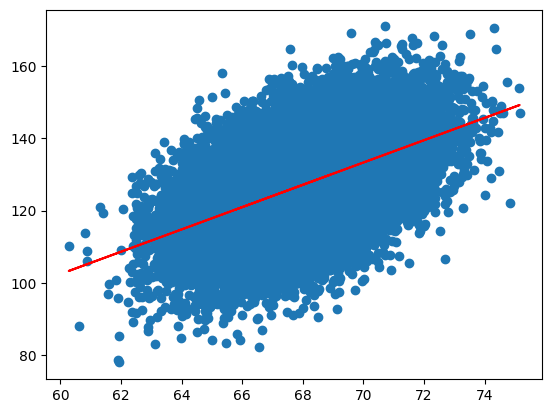

In [13]:
from matplotlib import pylab as plt
%matplotlib inline

plt.scatter(df['Height'], df['Weight'])

plt.plot(X, coef * X + intercept, 'r')

plt.show()

In [ ]:
# Задание 2

In [1]:
# Вернула к версии, где можно загрузить Бостонский датасет

!pip freeze | grep scikit

scikit-image==0.19.3
scikit-learn==1.1.3


In [11]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.datasets import load_boston

data = load_boston()
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
X_full = data.data
y_full = data.target

In [13]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(Xtrain, ytrain) # обучение модели

pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)

In [14]:
# mse test
mean_squared_error(pred_test, ytest)

24.291119474973485

In [15]:
# mse train
mean_squared_error(pred_train, ytrain)

21.641412753226312

In [16]:
# rmse test, train
rmse_test = mean_squared_error(pred_test, ytest) ** 0.5
rmse_train = mean_squared_error(pred_train, ytrain) ** 0.5

print(rmse_test, rmse_train)

# Можем сказать, что модель не переобучена, т.к. ошибка на тесте не ощутимо больше, чем на train.

4.928602182665333 4.6520331848801675


<Axes: >

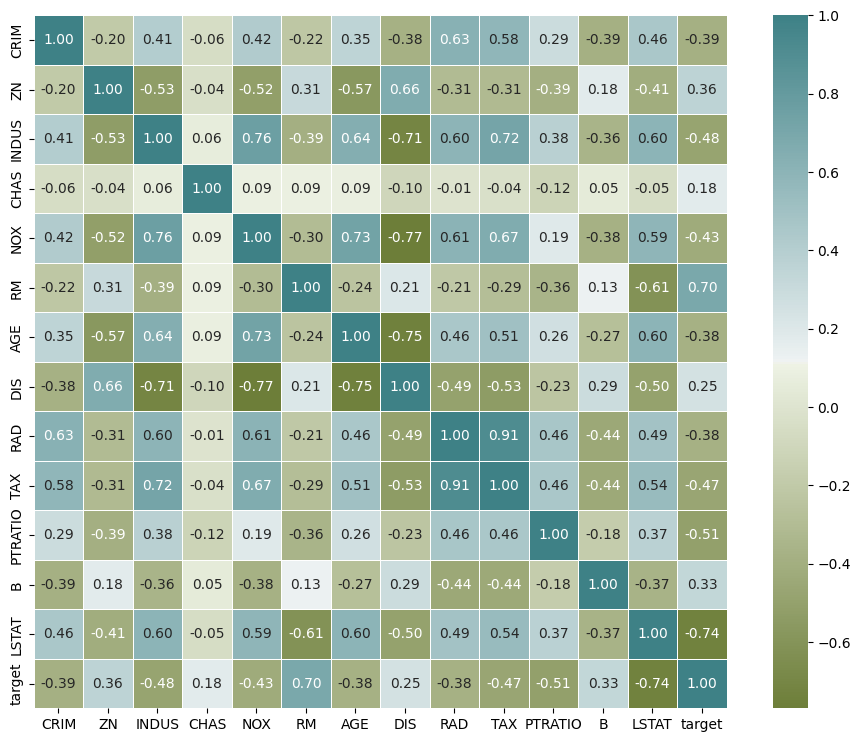

In [51]:
# Создаем матрицу корреляции признаков.

import seaborn as sns

from matplotlib import pyplot as plt

data1 = pd.DataFrame(data=np.c_[data['data'], data['target']],
                     columns=list(data['feature_names']) + ['target'])

plt.figure(figsize=(12,9))

corr = data1.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

# Можем видеть, например, высокую (0,91) корреляцию столбцов RAD и TAX: один из них можно удалить.

In [19]:
data1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [20]:
del data1['RAD']

In [21]:
data1['NEW'] = data1['LSTAT'] ** 2

In [22]:
y = data1['target']
X = data1.drop('target', axis=1)

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,NEW
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.8004
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,83.5396
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,16.2409
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,8.6436
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,28.4089


In [25]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(Xtrain, ytrain) # обучение модели
pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)
print(mean_squared_error(pred_test, ytest) ** 0.5, mean_squared_error(pred_train, ytrain) ** 0.5)

# Кажется, что после удаления столбца RAD и добавления столбца NEW ошибка стала немного меньше (но не уверена, что такие маленькие изменения значимы).

4.438930142789923 4.307348004969333


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  warnings.warn(


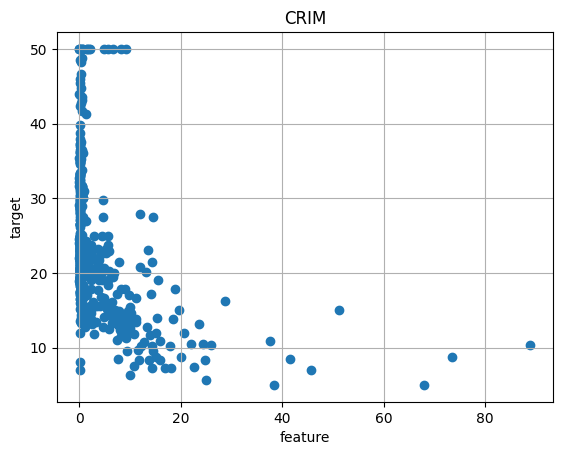

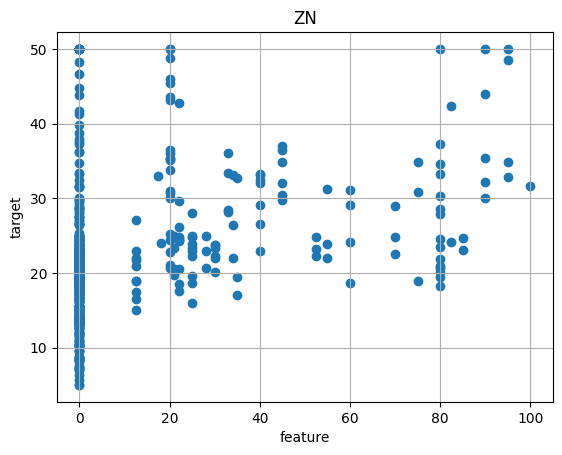

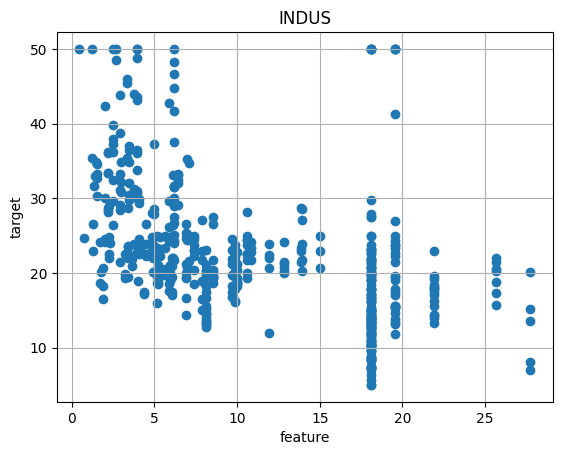

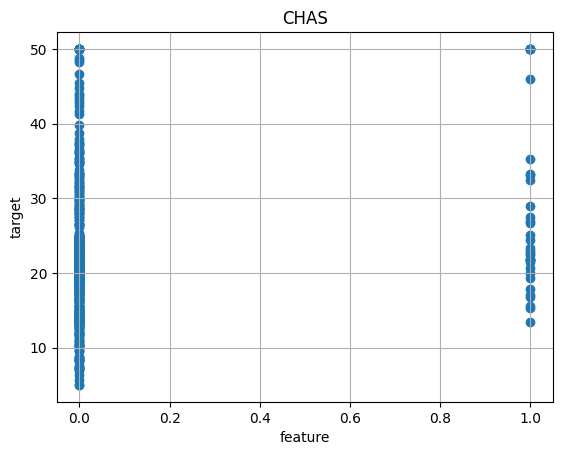

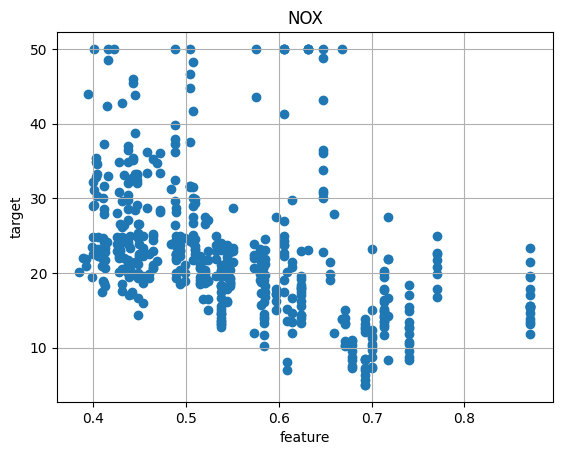

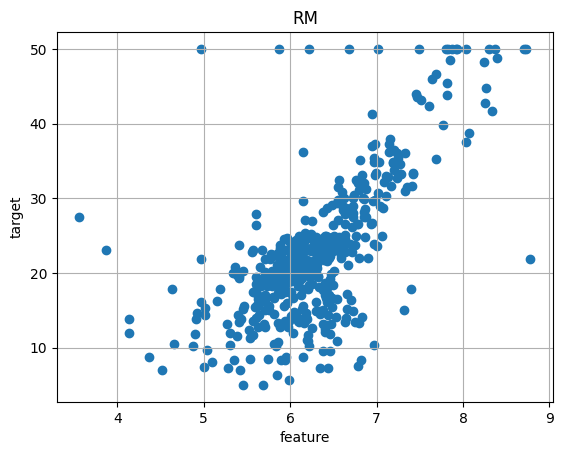

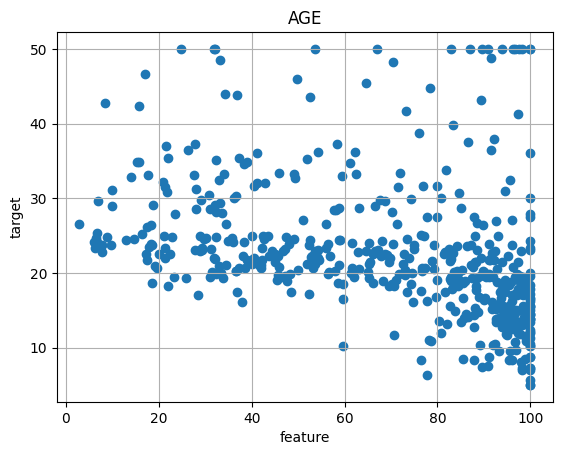

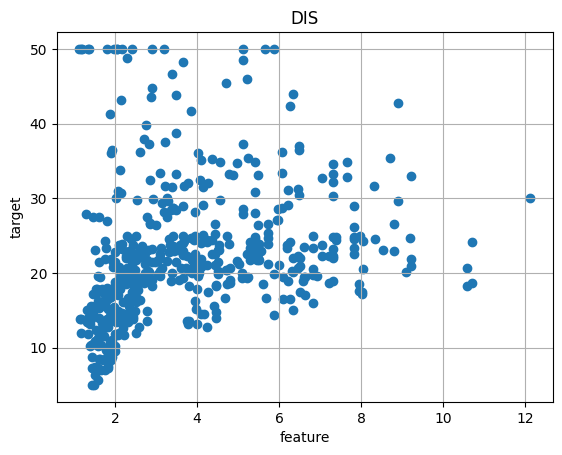

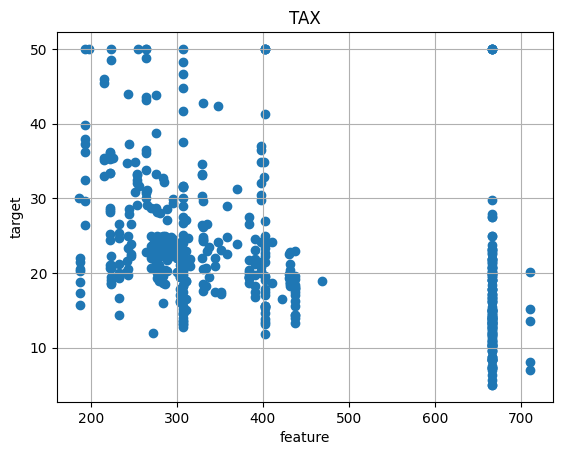

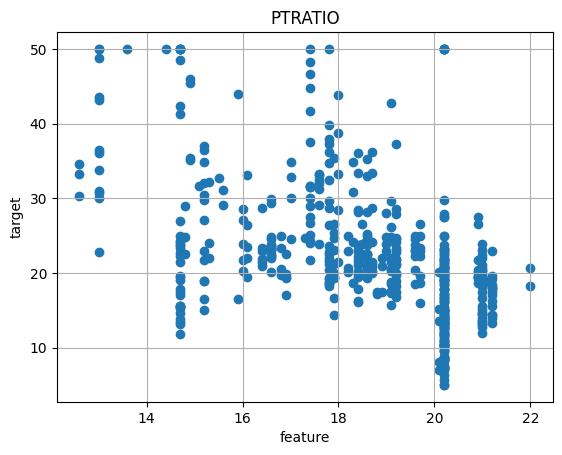

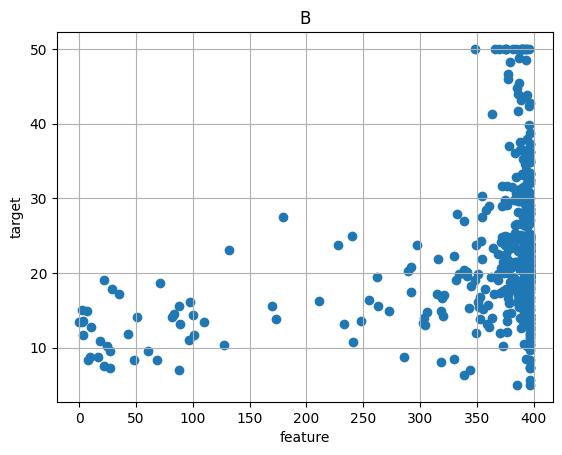

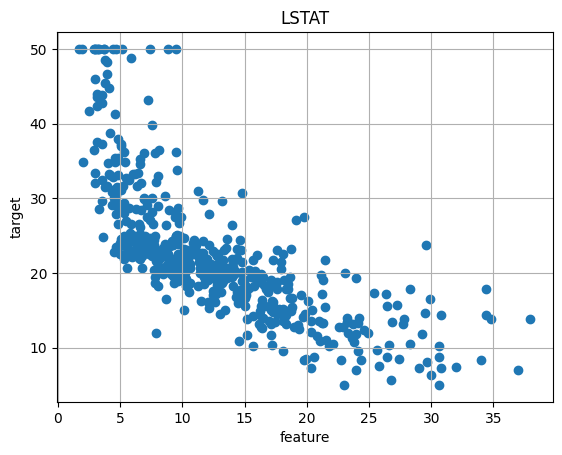

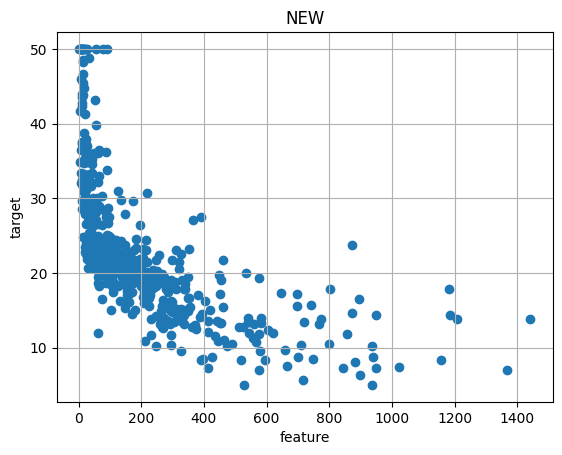

In [29]:
# Смотрим на распределение признаков с целевой переменной.

for c in data1.columns:
    if c != 'target':
        plt.title(c)
        plt.xlabel('feature')
        plt.ylabel('target')
        plt.grid(True)
        plt.scatter(data1[c], data1['target'])
        plt.show()

In [47]:
# Можно попробовать удалить те стобцы, которые, судя по матрице корреляций и отдельным распределениям, не сильно коррелируют с 'target'.
# Например, возьмем столбцы 'CHAS', 'DIS', 'B'.

X_2 = data1.drop(['CHAS', 'DIS', 'B', 'target'], axis=1)
y_2 = data1['target']

X_2.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT,NEW
0,0.00632,18.0,2.31,0.538,6.575,65.2,296.0,15.3,4.98,24.8004
1,0.02731,0.0,7.07,0.469,6.421,78.9,242.0,17.8,9.14,83.5396
2,0.02729,0.0,7.07,0.469,7.185,61.1,242.0,17.8,4.03,16.2409
3,0.03237,0.0,2.18,0.458,6.998,45.8,222.0,18.7,2.94,8.6436
4,0.06905,0.0,2.18,0.458,7.147,54.2,222.0,18.7,5.33,28.4089


In [48]:
# Для сравнения удалим не только малозначимые столбцы, но и несколько столбцов с высокой корреляцией с 'target'.
X_3 = data1.drop(['CHAS', 'DIS', 'B', 'target', 'LSTAT', 'RM'], axis=1)
y_3 = data1['target']

X_3.head()

,CRIM,ZN,INDUS,NOX,AGE,TAX,PTRATIO,NEW
0,0.00632,18.0,2.31,0.538,65.2,296.0,15.3,24.8004
1,0.02731,0.0,7.07,0.469,78.9,242.0,17.8,83.5396
2,0.02729,0.0,7.07,0.469,61.1,242.0,17.8,16.2409
3,0.03237,0.0,2.18,0.458,45.8,222.0,18.7,8.6436
4,0.06905,0.0,2.18,0.458,54.2,222.0,18.7,28.4089


In [49]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_2, y_2, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(Xtrain, ytrain)
pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)
print(mean_squared_error(pred_test, ytest) ** 0.5, mean_squared_error(pred_train, ytrain) ** 0.5)

# Качество значительно не изменилось, можно сделать вывод, что удаленные признаки не значимы (что можно было наблюдать по матрице корреляции)

4.564049792890636 4.614499508574416


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  warnings.warn(


In [50]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_3, y_3, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(Xtrain, ytrain)
pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)
print(mean_squared_error(pred_test, ytest) ** 0.5, mean_squared_error(pred_train, ytrain) ** 0.5)

# Если удалить признаки с высокой корреляцией, то ошибка меняется значительно.

6.024670877781708 6.503029156483761


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
# sns.pairplot(X_full)

In [ ]:
# Задание 3

In [292]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [293]:
df = pd.read_csv('Clean_Dataset.csv', index_col=0) # index_col=0 - убрать первый столбец с нумерацией

In [294]:
df.rename(columns={'class': 'flight_clss'}, inplace=True) # переименовала этот столбец, потому что он почему-то постоянно неправильно считывался

df.sample(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,flight_clss,duration,days_left,price
213167,Air_India,AI-839,Delhi,Night,one,Morning,Bangalore,Business,13.33,17,35490
223692,Air_India,AI-767,Delhi,Afternoon,one,Night,Chennai,Business,9.17,30,47657
115195,Indigo,6E-541,Bangalore,Morning,one,Afternoon,Hyderabad,Economy,3.67,47,1694
100014,Vistara,UK-850,Bangalore,Evening,zero,Night,Mumbai,Economy,1.92,35,2150
145973,Indigo,6E-958,Kolkata,Afternoon,one,Night,Hyderabad,Economy,7.08,32,4367
166745,Vistara,UK-860,Hyderabad,Early_Morning,one,Night,Bangalore,Economy,15.83,14,11497
141243,Vistara,UK-776,Kolkata,Evening,one,Evening,Bangalore,Economy,25.67,41,6195
14032,AirAsia,I5-710,Delhi,Morning,one,Night,Bangalore,Economy,11.58,22,3090
182074,SpiceJet,SG-612,Chennai,Night,one,Morning,Delhi,Economy,11.75,15,7352
38266,Indigo,6E-289,Delhi,Early_Morning,one,Morning,Chennai,Economy,4.92,21,6340


In [295]:
# Какие из столбцов не так важны для анализа? Возможно, столбец с номерами рейсов ('flight')

df.drop(['flight'], axis=1, inplace=True)

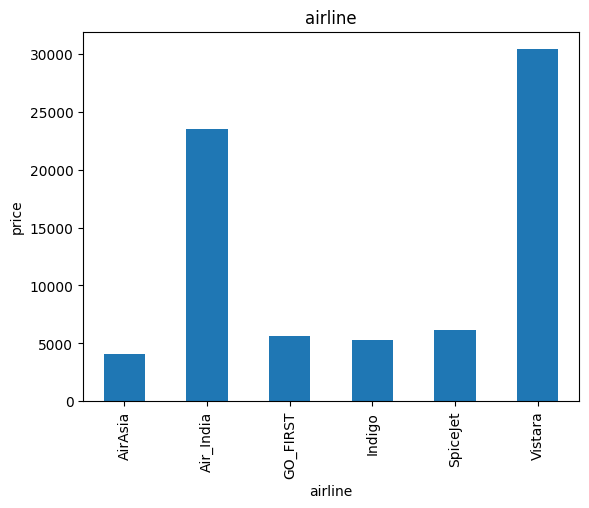

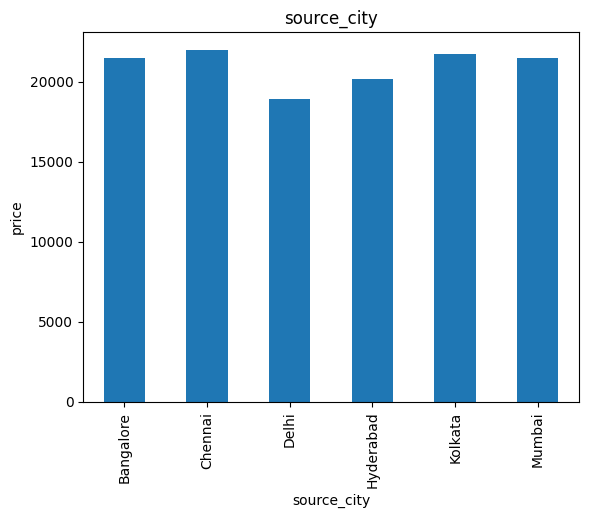

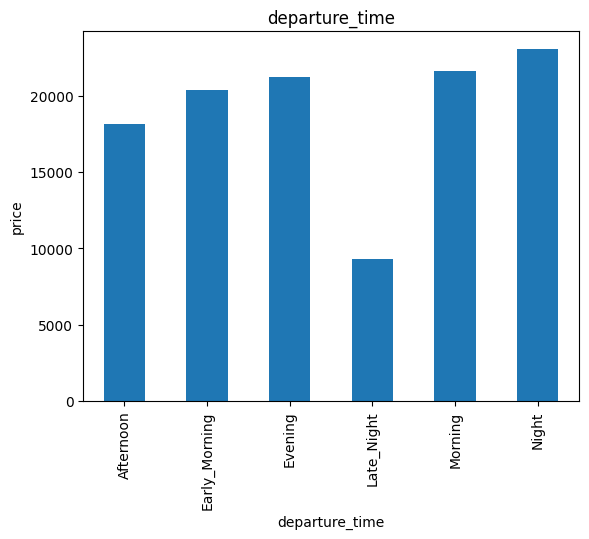

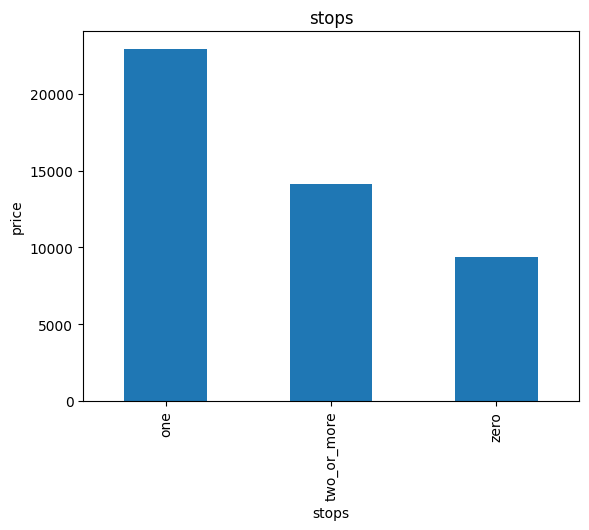

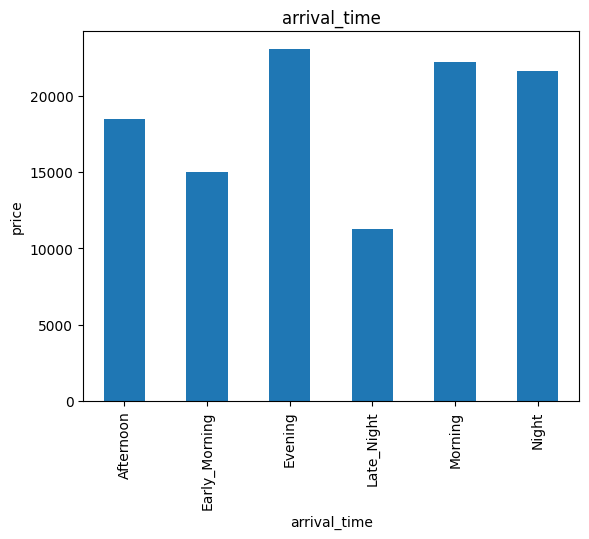

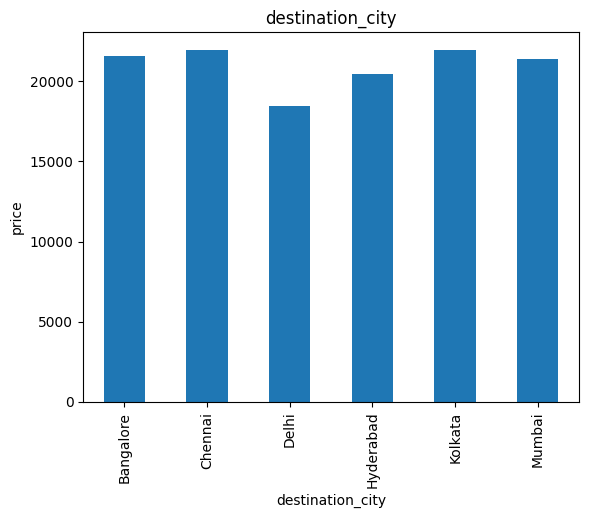

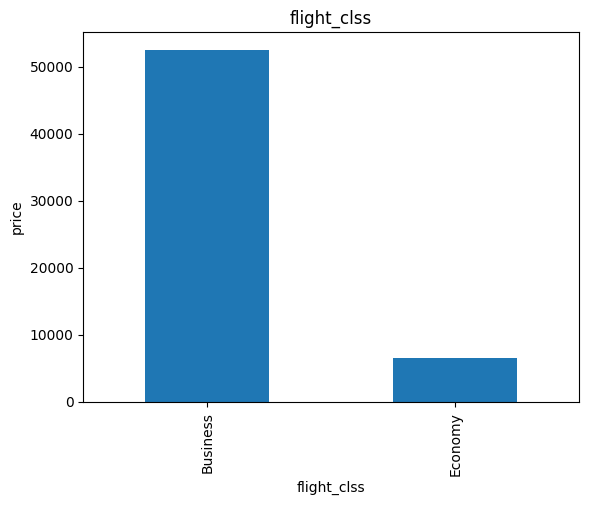

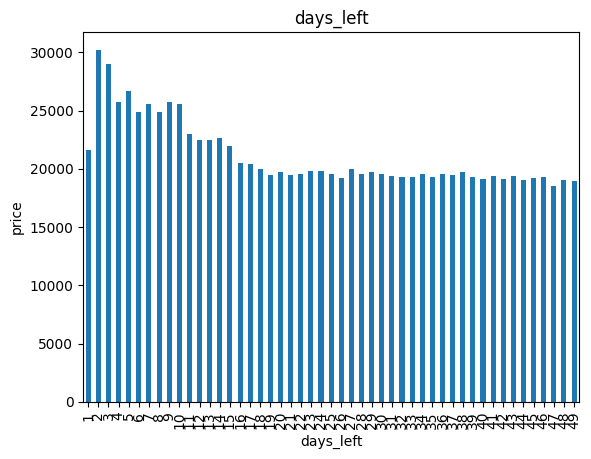

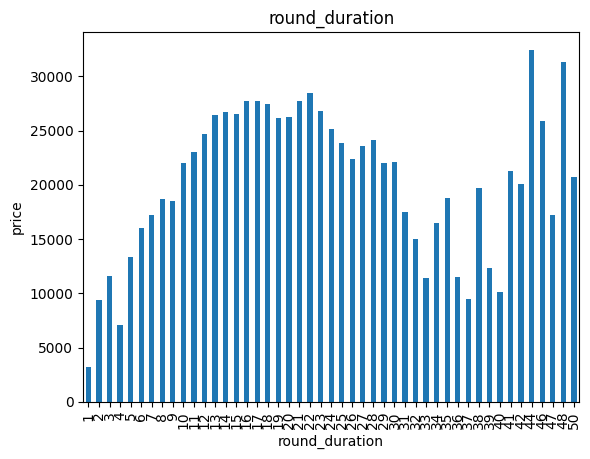

In [296]:
# Здесь и дальше проверяем содержимое столбцов (признаков) и зависимости между признаками и целевой переменной.
# Это нужно, чтобы подумать, как можно было бы перевести их из категориальных в числовые, а что-то, возможно, удалить.

def show_bar(df, xcol):
    df[[xcol, "price"]].groupby(xcol).agg(np.mean).plot.bar(legend=False)
    # строятся диаграммы; по оси у - ЦП (зд. - цена), по оси х - усредненные показатели по сгруппированным вариантам внутри признака
    plt.ylabel("price")
    plt.title(xcol)
    plt.show()

df["round_duration"] = df["duration"].apply(round) # округляем показатели длины полета для столбца "duration"

for col in df.columns:
    if col in ["duration", "price"]: # ЦП не включается, "duration" округлили
        continue
    show_bar(df, col)

# Признаки source_city и destination_city - не видно большой зависимости (можно будет попытаться посчитать без них?)
# Остальные признаки - легче всего c one-hot-encoding.

In [297]:
df = df.drop(columns=["duration"])

<ipython-input-298-05fbd10a0350>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df.corr(), cmap=sns.diverging_palette(100,200,as_cmap=True), annot=True)


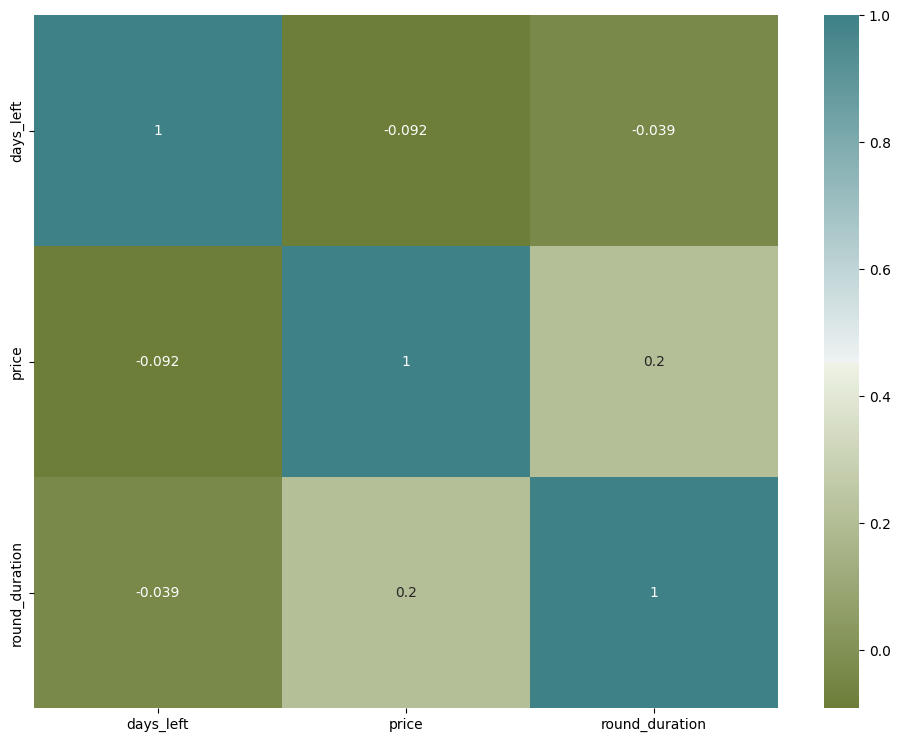

In [298]:
# C теми числовыми признаками, что есть сейчас (хотя их и немного), можно построить матрицу корреляций. Но в ней я почти ничего не вижу интересного.

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,9))
dataplot = sns.heatmap(df.corr(), cmap=sns.diverging_palette(100,200,as_cmap=True), annot=True)

plt.show()

In [299]:
# Признак flight_clаss можно записать в виде 0/1.

def business_or_not(val):
  return int(val == "Business") # True/False преобразуются в 1/0

df["business_or_not"] = df["flight_clss"].apply(business_or_not)
df.drop(columns=["flight_clss"])

,airline,source_city,departure_time,stops,arrival_time,destination_city,days_left,price,round_duration,business_or_not
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,1,5953,2,0
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,1,5953,2,0
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,1,5956,2,0
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,1,5955,2,0
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,1,5955,2,0
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,49,69265,10,1
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,49,77105,10,1
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,49,79099,14,1
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,49,81585,10,1


In [300]:
# Все остальные категориальные признаки можно перевести в числовые при помощи one-hot-encoding с get_dummies.
# К сожалению, с матрицей тогда не получается работать, слишком она огромная...

df1 = pd.get_dummies(df)
df1.head(5)

,days_left,price,round_duration,business_or_not,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,flight_clss_Business,flight_clss_Economy
0,1,5953,2,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
1,1,5953,2,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1
2,1,5956,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,1,5955,2,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
4,1,5955,2,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,1


In [301]:
# Деление на test и train, обучение модели, RMSE

X = df1.drop(['price'], axis=1)
y = df1['price']

In [302]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression()

model.fit(Xtrain, ytrain)

pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)

print(f"Значение RMSE на test: {mean_squared_error(pred_test, ytest) ** 0.5} \nЗначение RMSE на train: {mean_squared_error(pred_train, ytrain) ** 0.5}")

Значение RMSE на test: 6704.456472945995 
Значение RMSE на train: 6766.321027473409


In [126]:
print(f"Значение mean для цены: {df.price.mean()}")

Значение mean для цены: 20889.660523133203


In [ ]:
# Модель не переобучена, т.к. разница на train и на test небольшая, но итоговая ошибка кажется довольно большой.
# Возможно, учитывая, что средняя цена билета тоже довольно высока, ошибка не будет казаться огромной, но все-таки не очень хорошо.
# Пробовала удалять признаки, где не было явной зависимости с target (например, source_city и destination_city), но это не уменьшило ошибку,
# а увеличило (поэтому не стала сохранять в итоговом варианте).

In [ ]:
# Домашняя работа

# Задание 1

In [303]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [321]:
df = pd.read_csv('Car details v3.csv')
df.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
4293,Honda City i VTEC CVT SV,2016,750000,50000,Petrol,Individual,Automatic,First Owner,18.0 kmpl,1497 CC,117.3 bhp,145Nm@ 4600rpm,5.0
4299,Mercedes-Benz New C-Class C 200 Kompressor Ele...,2006,650000,40000,Petrol,Individual,Manual,First Owner,11.7 kmpl,1796 CC,178 bhp,"24.5@ 3,500-4,500(kgm@ rpm)",5.0
2740,Maruti Zen Estilo LXI Green (CNG),2011,200000,80000,CNG,Individual,Manual,First Owner,26.3 km/kg,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
7574,Hyundai Verna 1.6 SX CRDi (O),2012,590000,110000,Diesel,Individual,Manual,Second Owner,22.32 kmpl,1582 CC,126.32 bhp,259.8Nm@ 1900-2750rpm,5.0
7024,Maruti Ciaz RS ZXi Plus,2015,550000,29434,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4824,Toyota Innova 2.5 VX (Diesel) 7 Seater,2013,750000,79328,Diesel,Trustmark Dealer,Manual,Second Owner,12.99 kmpl,2494 CC,100.6 bhp,200Nm@ 1200-3600rpm,7.0
476,Maruti Ertiga VXI,2014,610000,21000,Petrol,Individual,Manual,First Owner,16.02 kmpl,1373 CC,93.7 bhp,130Nm@ 4000rpm,7.0
6034,Hyundai i10 Era,2010,142000,49200,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
7411,Toyota Innova Crysta 2.4 GX MT 8S BSIV,2018,1650000,20000,Diesel,Individual,Manual,First Owner,13.68 kmpl,2393 CC,147.8 bhp,343Nm@ 1400-2800rpm,8.0
2663,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0


In [322]:
# Убираем NaN

df = df.dropna()

In [323]:
missing_values = df.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0] / df.shape[0]
print(f'{missing_values * 100} %')

Series([], dtype: float64) %


In [324]:
# Работаем со столбцами "mileage", "engine", "max_power", убираем нечисловые части

def extract_value(val):
    if val == False:
      return 0
    elif val.split()[0] == 'bhp':
      return 0
    else:
      return float(val.split()[0])

df["mileage"] = df["mileage"].apply(extract_value)
df["max_power"] = df["max_power"].apply(extract_value)

def extract_value_1(val):
    if val == False:
      return 0
    else:
      return int(val.split()[0])

df["engine"] = df["engine"].apply(extract_value_1)

In [325]:
# Не уверена в том, как можно очистить "torque", поэтому пока не буду его учитывать:(
df = df.drop(columns=["torque"])

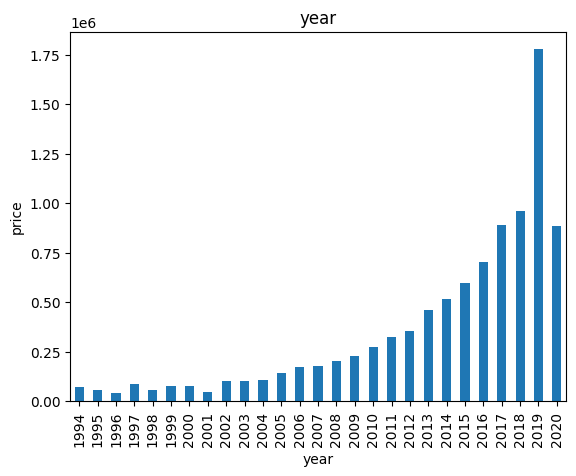

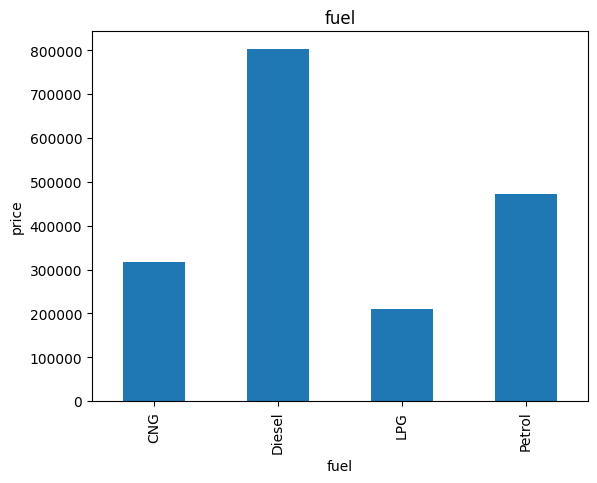

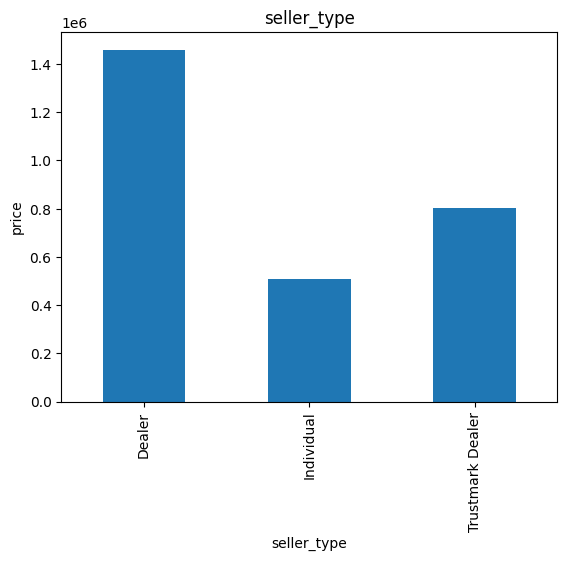

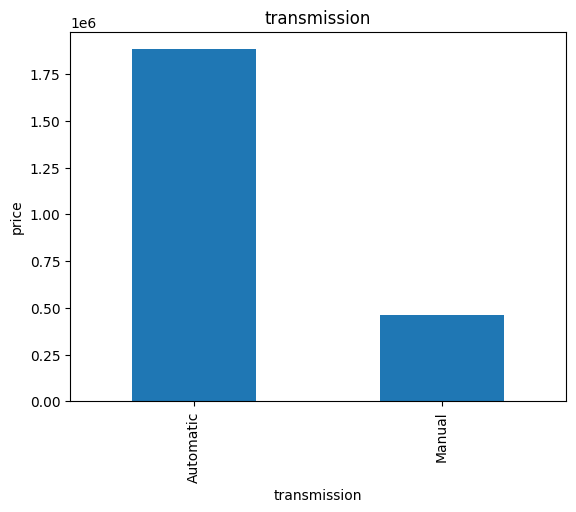

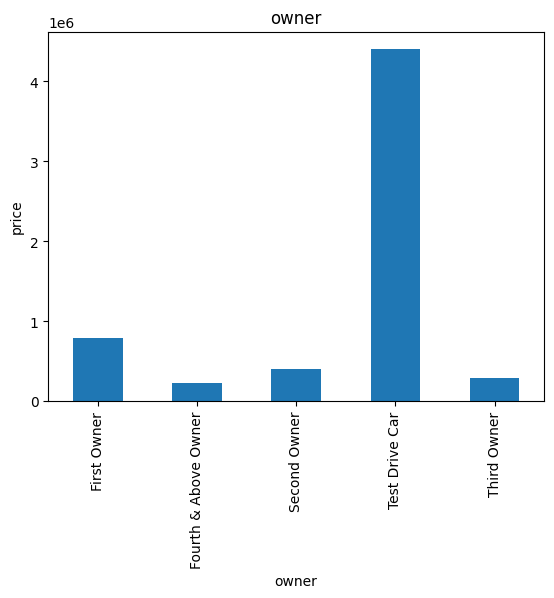

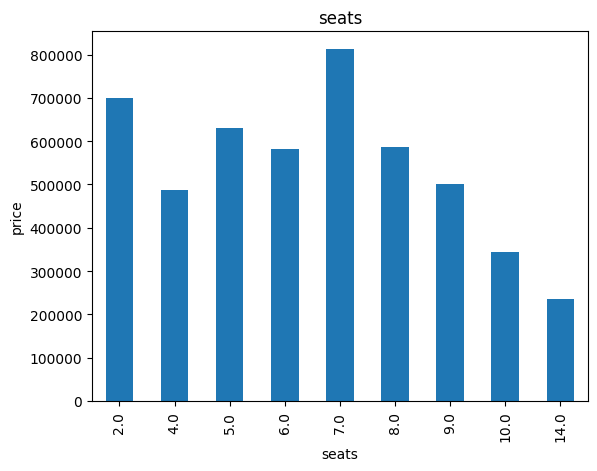

In [326]:
# Строим диаграммы зависимостей для категориальных признаков и ЦП - цены. Для некоторых числовых с небольшим кол-вом вариантов тоже построю.
def show_bar(df, xcol):
    df[[xcol, "selling_price"]].groupby(xcol).agg(np.mean).plot.bar(legend=False)
    plt.ylabel("price")
    plt.title(xcol)
    plt.show()

for col in df.columns:
    if col in ["name", "selling_price", "mileage", "km_driven", "engine", "max_power"]:
        continue
    show_bar(df, col)

<ipython-input-327-8719bcdabead>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df.corr(), cmap=sns.diverging_palette(100,200,as_cmap=True), annot=True)


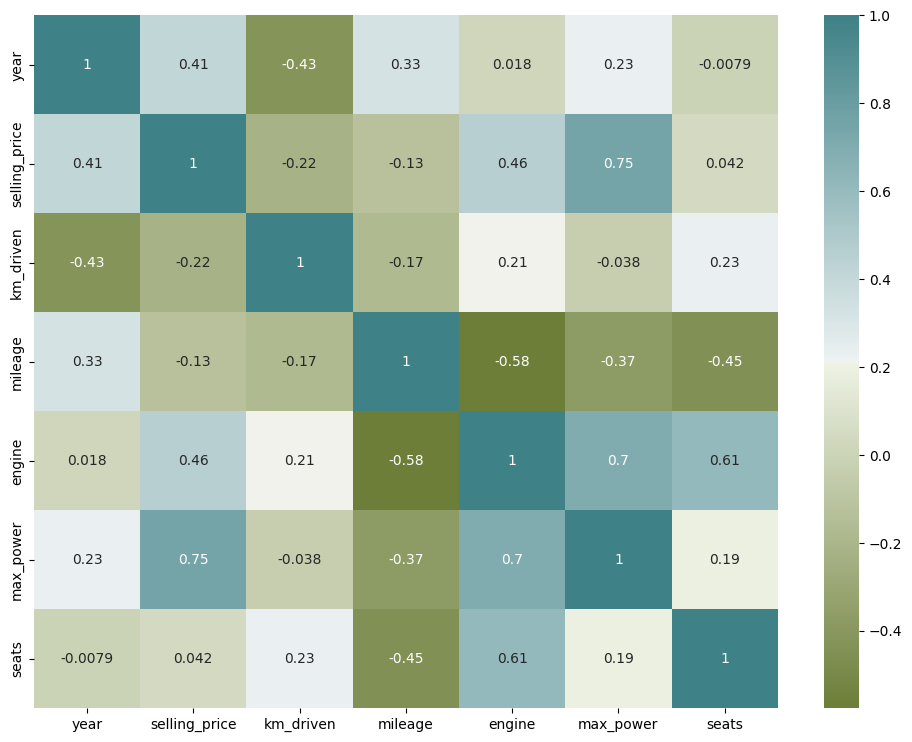

In [327]:
# по матрице корреляций видна высокая корреляция столбца "max_power" с "engine" и "selling_price". Можно попробовать удалить "max_power".
# UPD. Гипотеза не подтвердилась, если удалить "max_power", то результат еще хуже:(
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,9))
dataplot = sns.heatmap(df.corr(), cmap=sns.diverging_palette(100,200,as_cmap=True), annot=True)

plt.show()

In [328]:
# Заканчиваем подготовку данных. Работаем со столбцом transmission - переводим в вид 0/1.

def is_manual(s):
  return int(s == "Manual")

df["is_manual"] = df["transmission"].apply(is_manual)
df = df.drop(columns=["transmission"])

In [329]:
# Удаляем "name"

df = df.drop(columns=["name"])

In [330]:
# Обрабатываем "owner"

def map_owners(owner):
  dct = {'First Owner': 1,  'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 5}
  return dct[owner]

df['owner'] = df['owner'].apply(map_owners)

In [331]:
# Обрабатываем оставшиеся категориальные признаки с one-hot-encoding

df = pd.get_dummies(df)

In [332]:
df.sample(5)

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats,is_manual,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
5284,2012,250000,100000,3,19.30,1248,73.9,5.0,1,0,1,0,0,0,1,0
6394,2010,225000,100000,2,17.80,1399,68.0,5.0,1,0,1,0,0,0,1,0
1287,2010,140000,75000,1,18.60,1199,79.4,5.0,1,0,0,0,1,0,1,0
2882,2015,1100000,137000,1,12.99,2494,100.6,7.0,1,0,1,0,0,0,1,0
7370,2017,1789999,36000,1,13.68,2393,147.8,8.0,1,0,1,0,0,1,0,0


In [333]:
# Убрать дубликаты
df.drop_duplicates(inplace=True)

In [334]:
# Деление на test и train, обучение модели, RMSE

X = df.drop(['selling_price'], axis=1)
y = df['selling_price']

In [335]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression()

model.fit(Xtrain, ytrain)

pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)

print(f"Значение RMSE на test: {mean_squared_error(pred_test, ytest) ** 0.5} \nЗначение RMSE на train: {mean_squared_error(pred_train, ytrain) ** 0.5}")

Значение RMSE на test: 329511.0885208043 
Значение RMSE на train: 321784.43826539273


In [236]:
print(f"Значение mean для цены: {df.selling_price.mean()}")

Значение mean для цены: 638271.8077017716
